In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
import random
num_of_classes = 3

In [2]:
data = open("Data/iris.data","r").readlines()
for i in range(len(data)):
    data[i] = data[i].split(',')
random.shuffle(data)
train_data = data[0:35]+data[50:85]+data[100:135]

train_x = []
train_y = []

for i in range(len(train_data)):
    train_x.append([float(j) for j in train_data[i][0:4]])
    if 'setosa' in train_data[i][4]:
        train_y.append([1,0,0])
    elif 'versicolor' in train_data[i][4]:
        train_y.append([0,1,0])
    else:
        train_y.append([0,0,1])

train_x = np.array(train_x)
train_y = np.array(train_y)
train_x.shape, train_y.shape
# tran_y

((105, 4), (105, 3))

In [3]:
model = keras.Sequential()
model.add(Dense(units=50,activation='relu',input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units = 25, activation = 'relu'))
# model.add(Dense(units = 30, activation = 'relu'))
# model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = num_of_classes, activation = 'softmax'))
model.summary()
model.compile(loss='CategoricalCrossentropy',optimizer = 'sgd',metrics=[keras.metrics.categorical_accuracy])
history = model.fit(train_x,train_y,epochs=300)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 1s 3ms/step - loss: 1.5707 - categorical_accuracy: 0.3496
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 1.0746 - categorical_accuracy: 0.3382
Epoch 3/300
4/4 [=================

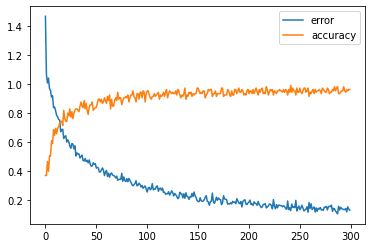

In [4]:
import matplotlib.pyplot as plt
plt.figure('error vs epoch')
plt.plot(history.history['loss'],label = 'error')
plt.plot(history.history['categorical_accuracy'],label = 'accuracy')
plt.legend()
# history.history

In [5]:
test_data = data[35:50]+data[85:100]+data[135:150]

test_x = []
test_y = []

for i in range(len(test_data)):
    test_x.append([float(j) for j in test_data[i][0:4]])
    if 'setosa' in test_data[i][4]:
        test_y.append([1,0,0])
    elif 'versicolor' in test_data[i][4]:
        test_y.append([0,1,0])
    else:
        test_y.append([0,0,1])
    

test_x = np.array(test_x)
test_y = np.array(test_y)

prediction = model.predict(test_x)

# test_y[0],prediction[0]

# count = 0
# for i in range(len(prediction)):
#     prediction[i] = [round(prediction[i][0],0),round(prediction[i][1],0),round(prediction[i][2],0)]
#     if (prediction[i] == test_y[i]).all():
#         count += 1
#     else:
#         print(prediction[i],test_y[i])
# count/len(prediction)
prediction =  prediction.tolist()
test_y = test_y.tolist()
for i in range(len(prediction)):
    prediction[i] = prediction[i].index(max(prediction[i]))
    test_y[i] = test_y[i].index(max(test_y[i]))

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(test_y,prediction)
accuracy_score(test_y,prediction)


0.9777777777777777